In [1]:
#!pip install ip2geotools

In [2]:
#!pip install ua-parser

In [ ]:
#!pip install user_agents

In [ ]:
#!pip install datasist

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import datetime as dt
from datetime import datetime


In [40]:

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

# Sendy_logistics Data 

In [41]:
df = pd.read_csv("sendy_logistics.csv")
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [43]:
df.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [44]:
df["Temperature"].value_counts()

24.7    201
22.4    196
23.8    195
23.7    191
24.6    189
       ... 
32.0      2
31.9      2
14.0      1
13.8      1
11.2      1
Name: Temperature, Length: 188, dtype: int64

In [45]:
df["Precipitation in millimeters"].value_counts()

2.0     39
1.9     37
0.9     35
1.1     34
3.0     29
3.1     27
2.1     25
2.9     22
1.0     21
3.9     19
0.3     18
4.0     18
0.8     14
4.9     14
11.0    13
4.1     13
0.4     12
5.0     11
0.7     11
11.1     9
0.2      9
10.9     8
15.9     8
16.1     8
0.5      8
9.1      6
0.1      6
98.9     5
8.9      5
16.0     5
5.1      5
13.9     5
17.0     4
51.1     4
14.0     4
51.9     4
0.6      4
7.0      3
51.0     3
99.1     3
7.1      2
50.9     2
83.0     2
82.9     2
83.1     2
43.0     2
9.0      2
52.1     2
16.9     2
42.9     2
17.1     1
14.9     1
43.1     1
99.0     1
Name: Precipitation in millimeters, dtype: int64

By observing the columns temperature and Perception in Kilometers, both columns contains nans values; therefore, one decided to replace the missing values using the KNN 

In [46]:
imputer = KNNImputer()

In [47]:
df['Temperature'] = imputer.fit_transform(df[['Temperature']])
df["Precipitation in millimeters"]= imputer.fit_transform(df[['Precipitation in millimeters']])

In [48]:
df["Temp_Diff"] = abs(df["Temperature"]- 29)
df["Temp_Diff"].value_counts()

5.741111     4366
1.700000      202
4.300000      201
6.600000      196
5.200000      195
             ... 
15.500000       4
15.100000       2
17.800000       1
15.000000       1
15.200000       1
Name: Temp_Diff, Length: 161, dtype: int64

# Transferring the Celicus into Fehrenheit 

T(°F) = T(°C) × 9/5 + 32 so the previous equation is meant for transfering the degrees from Celicus to Fehrenheit 

In [49]:
df["Fehr_Temp"]= (df["Temperature"]* 9/5) + 32
df["Fehr_Temp"].value_counts()

73.866001    4366
76.460000     201
72.320000     196
74.840000     195
74.660000     191
             ... 
57.020000       2
89.420000       2
57.200000       1
56.840000       1
52.160000       1
Name: Fehr_Temp, Length: 189, dtype: int64

In [50]:
def separator(x):
    x = x.split('_')
    x = x[2]
    return x

In [51]:
df['User_ID'] = df['User Id'].apply(separator)
df["User_ID"]

0         633
1        2285
2         265
3        1402
4        1737
         ... 
21196    2001
21197    1796
21198    2956
21199    2524
21200     718
Name: User_ID, Length: 21201, dtype: object

# UFO Data 

In [52]:
df1 = pd.read_csv("ufo.csv")
df1

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [54]:
df1.describe()

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


In [55]:
df1.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [56]:
for col in df1.columns:
    print(f'For column {col}\n------------------\n')
    print(df1[col].value_counts())
    print('\n')

For column City
------------------

Seattle           187
New York City     161
Phoenix           137
Houston           108
Las Vegas         105
                 ... 
Springbrook         1
Westbrook           1
Franklin Park       1
Ft. Richardson      1
Cedar River         1
Name: City, Length: 6476, dtype: int64


For column Colors Reported
------------------

RED                       780
GREEN                     531
ORANGE                    528
BLUE                      450
YELLOW                    169
RED GREEN                  89
RED BLUE                   78
RED ORANGE                 44
GREEN BLUE                 34
RED GREEN BLUE             33
ORANGE YELLOW              26
RED YELLOW                 25
ORANGE GREEN               23
YELLOW GREEN               17
ORANGE BLUE                10
RED YELLOW GREEN            9
YELLOW BLUE                 6
ORANGE GREEN BLUE           5
YELLOW GREEN BLUE           5
RED YELLOW GREEN BLUE       4
RED ORANGE YELLOW           4
RED 

Since the City, Color Reported and Shape Reported have Nans, I will use the simple imputer to replace the missing values with the most frequent value since all the missing values are categories 

In [57]:
imputer = SimpleImputer(strategy='most_frequent')

In [58]:
df1['City'] = imputer.fit_transform(df1[['City']])
df1['Colors Reported'] = imputer.fit_transform(df1[['Colors Reported']])
df1['Shape Reported'] = imputer.fit_transform(df1[['Shape Reported']])


In [59]:
df1.isnull().sum()

City               0
Colors Reported    0
Shape Reported     0
State              0
Time               0
dtype: int64

In [60]:
df1["Time"] = pd.to_datetime(df1["Time"], infer_datetime_format=True)
df1["Months"] = df1["Time"].dt.month_name()

In [61]:
df1["Months"].value_counts()

June         3059
July         2345
August       1948
October      1723
September    1635
November     1509
May          1168
March        1096
April        1045
December     1034
January       862
February      817
Name: Months, dtype: int64

In [62]:
df1["IN_December"] = np.where(df1["Months"]== "December", 1, 0)

In [63]:
df1["Time"].value_counts()

1999-11-16 19:00:00    27
1999-11-16 18:05:00    20
1999-11-16 19:05:00    19
1999-09-01 21:30:00    19
1999-11-16 18:00:00    17
                       ..
1996-05-09 21:23:00     1
1999-03-26 22:37:00     1
1978-06-12 00:00:00     1
1980-10-01 23:00:00     1
2000-06-23 22:40:00     1
Name: Time, Length: 16145, dtype: int64

In [64]:
my_string = '1914-07-28'
my_date = datetime.strptime(my_string, '%Y-%m-%d')

# Calculating the difference in time since the first world war 

In [65]:
df1["Time_Diff_From_WW1"] = round((df1["Time"] - my_date).dt.days / 365, 1)
df1["Time_Diff_From_WW1"]

0        15.9
1        15.9
2        16.6
3        16.9
4        18.7
         ... 
18236    86.5
18237    86.5
18238    86.5
18239    86.5
18240    86.5
Name: Time_Diff_From_WW1, Length: 18241, dtype: float64

# Titanic Data 

In [66]:
titanic = pd.read_csv("titanic_full.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
for col in titanic.columns:
    print(f'For column {col}\n------------------\n')
    print(titanic[col].value_counts())
    print('\n')

For column PassengerId
------------------

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64


For column Survived
------------------

0    549
1    342
Name: Survived, dtype: int64


For column Pclass
------------------

3    491
1    216
2    184
Name: Pclass, dtype: int64


For column Name
------------------

Berriman, Mr. William John          1
O'Connell, Mr. Patrick D            1
Salkjelsvik, Miss. Anna Kristine    1
Smiljanic, Mr. Mile                 1
Balkic, Mr. Cerin                   1
                                   ..
Stewart, Mr. Albert A               1
Daniel, Mr. Robert Williams         1
Jalsevac, Mr. Ivan                  1
Hassan, Mr. Houssein G N            1
Homer, Mr. Harry ("Mr E Haven")     1
Name: Name, Length: 891, dtype: int64


For column Sex
------------------

male      577
female    314
Name: Sex, dtype: int64


For column Age
------------------

24.00    3

In [71]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna(titanic['Cabin'].mode()[0], inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [72]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [73]:
def separator1(x):
    x = x.split('.')
    x = x[0]
    return x

In [74]:
def separator2(x):
    x = x.split(',')
    x = x[1]
    return x

In [75]:
titanic['title'] = titanic['Name'].apply(separator1).apply(separator2)
titanic["title"]

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: title, Length: 891, dtype: object

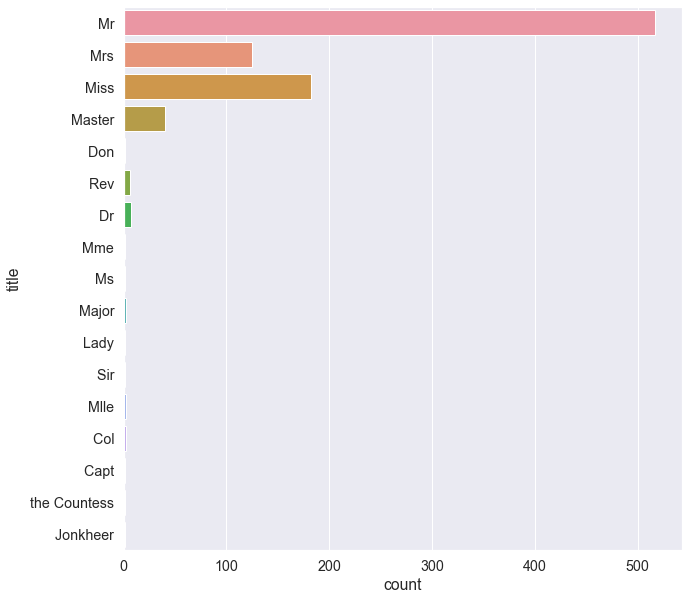

In [76]:
sns.countplot(y='title', data=titanic)

# Visitor data 

In [117]:
import user_agents

In [116]:
from ua_parser import user_agent_parser

In [77]:
visitors = pd.read_csv("visitor-interests.csv")
visitors

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company
...,...,...,...,...,...
19921,223.62.3.2,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19922,223.62.67.192,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19923,223.73.243.82,Mozilla/5.0 (Linux; U; Android 5.1.1; zh-cn; v...,CN,chinese,educational institution
19924,223.73.66.65,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,CN,english,magazine


In [78]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IP         19926 non-null  object
 1   UserAgent  19926 non-null  object
 2   Country    16721 non-null  object
 3   Languages  19926 non-null  object
 4   Interests  19919 non-null  object
dtypes: object(5)
memory usage: 778.5+ KB


In [79]:
visitors.describe()

,IP,UserAgent,Country,Languages,Interests
count,19926,19926,16721,19926,19919
unique,18443,4826,165,153,505
top,136.243.35.158,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,english,company
freq,19,878,4800,14535,6552


In [80]:
visitors.isnull().sum()

IP              0
UserAgent       0
Country      3205
Languages       0
Interests       7
dtype: int64

In [81]:
from sklearn.impute import SimpleImputer

In [82]:
imputer = SimpleImputer(strategy='most_frequent')

In [83]:
visitors['Country'] = imputer.fit_transform(visitors[['Country']])
visitors['Interests'] = imputer.fit_transform(visitors[['Interests']])

In [84]:
visitors.isnull().sum()

IP           0
UserAgent    0
Country      0
Languages    0
Interests    0
dtype: int64

In [85]:
visitors["IP"].value_counts()

136.243.35.158     19
136.243.17.161     19
222.255.236.117    19
148.251.54.44      18
69.30.236.154      18
                   ..
77.162.144.209      1
99.224.202.38       1
169.237.26.231      1
202.5.157.14        1
197.239.66.103      1
Name: IP, Length: 18443, dtype: int64

# Determining the OS like either being Windows, Android or IOS from the User Agent, and the used browser and the type of the utilized device

In [118]:
def extract_os(ua):
    ua = user_agents.parse(ua)
    return ua.os.family

def extract_browser(ua):
    ua = user_agents.parse(ua)
    return ua.browser.family


def extract_device(ua):
    ua = user_agents.parse(ua)
    return ua.device.family


In [120]:
visitors['OS'] = visitors['UserAgent'].apply(extract_os)

In [121]:
visitors['Browser'] = visitors['UserAgent'].apply(extract_browser)

In [122]:
visitors['Device'] = visitors['UserAgent'].apply(extract_device)

In [123]:
visitors

,IP,UserAgent,Country,Languages,Interests,Longitude,latitude,Dist_From_Egypt,OS,Browser,Device
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,None,None,9932.031034,Windows,Chrome,Other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Missing,14.705,NaN,Windows,Chrome,Other
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Missing,35.0978,NaN,Windows,Chrome,Other
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Missing,-33.4193,NaN,Android,Chrome,Nexus 9
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Missing,-33.4193,NaN,iOS,Mobile Safari,iPad
...,...,...,...,...,...,...,...,...,...,...,...
19921,223.62.3.2,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website,NaN,NaN,NaN,Android,Chrome Mobile,Samsung SM-N920S
19922,223.62.67.192,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website,NaN,NaN,NaN,Android,Chrome Mobile,Samsung SM-N920S
19923,223.73.243.82,Mozilla/5.0 (Linux; U; Android 5.1.1; zh-cn; v...,CN,chinese,educational institution,NaN,NaN,NaN,Android,QQ Browser Mobile,vivo X7L
19924,223.73.66.65,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,CN,english,magazine,NaN,NaN,NaN,Mac OS X,Firefox,Mac


# Visitor Interest Data 

# Extracting the latitude and longitude from the IP address 

In [88]:
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo

In [89]:
def extract_longitude_from_ip(ip):
    try:
        response = ip2geo.get(ip, api_key='free')
        return response.longitude
    except:
        return 'Missing'
    


In [97]:
visitors['Longitude'] = visitors['IP'].iloc[0:100].apply(extract_longitude_from_ip)

In [95]:
def extract_latitude_from_ip(ip):
    try:
        response = ip2geo.get(ip, api_key='free')
        return response.latitude
    except:
        return 'Missing'
    

In [96]:
visitors['latitude'] =  visitors['IP'].iloc[0:100].apply(extract_latitude_from_ip)

In [100]:
from datasist.feature_engineering import haversine_distance

In [101]:
Egypt_dimensions = [26.8206, 30.8025]

In [103]:
 Egypt_dimensions[0]

26.8206

In [104]:
Egypt_dimensions[1]

30.8025

In [110]:
visitors["Longitude"].value_counts()

Missing              35
151.2164539          11
144.9631608           7
121.4656619           6
72.8353355            4
77.2090057            3
100.6342069           3
125.17148885          3
77.5809833            2
127.0016472           2
138.5999312           2
153.0234991           2
145.7841829           1
73.4050474            1
74.6599022            1
120.3025585           1
88.642096             1
121.4647421           1
102.2956744           1
103.653095            1
107.4526239           1
113.487374            1
120.4884652           1
100.3379386           1
77.00270014657752     1
153.1354434           1
153.4145987           1
77.3910727            1
77.401989             1
Name: Longitude, dtype: int64

In [112]:
visitors["Dist_From_Egypt"]= haversine_distance(visitors['Longitude'][5],visitors['latitude'][10], Egypt_dimensions[0], Egypt_dimensions[1])

# Salaries Data 

In [228]:
salary = pd.read_csv("Salaries.csv")
salary

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [229]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [230]:
salary.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [231]:
salary.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [232]:
salary['BasePay'].fillna(salary['BasePay'].median(), inplace=True)
salary['Benefits'].fillna(salary['Benefits'].median(), inplace=True)
salary['OvertimePay'].fillna(salary['OvertimePay'].median(), inplace=True)
salary['OtherPay'].fillna(salary['OtherPay'].median(), inplace=True)

In [233]:
salary["Notes"].median()


nan

In [234]:
salary["Status"].median()

nan

since both features of notes and status have lots of nans values to an extent that the mean and the median of these 
columns are nans, one decided to drop them 

In [235]:
salary.drop(["Notes","Status"], axis = 1, inplace = True) 

In [236]:
salary.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [237]:
salary

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,28628.62,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,28628.62,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,28628.62,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,28628.62,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,28628.62,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,65007.45,0.00,811.27,28628.62,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,65007.45,0.00,811.27,28628.62,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,65007.45,0.00,811.27,28628.62,0.00,0.00,2014,San Francisco


# Applying the Principle Component Analysis 

In [238]:
salary.drop(["Id","EmployeeName","JobTitle","Agency"], axis = 1, inplace = True)


In [239]:
from sklearn.decomposition import PCA

pca = PCA(0.9)

x = pca.fit_transform(salary)



In [240]:
pca.n_components_

1

In [241]:
pca.explained_variance_ratio_

array([0.9506638])